In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

Data overview

In [2]:
df=pd.read_csv('/content/student_lifestyle_100k (1).csv')

In [3]:
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [4]:
df.shape

(100000, 11)

In [5]:
df.columns.to_list()

['Student_ID',
 'Age',
 'Gender',
 'Department',
 'CGPA',
 'Sleep_Duration',
 'Study_Hours',
 'Social_Media_Hours',
 'Physical_Activity',
 'Stress_Level',
 'Depression']

In [6]:
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Department,object
CGPA,float64
Sleep_Duration,float64
Study_Hours,float64
Social_Media_Hours,float64
Physical_Activity,int64
Stress_Level,int64


Check missing and duplicates values

In [7]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Department,0
CGPA,0
Sleep_Duration,0
Study_Hours,0
Social_Media_Hours,0
Physical_Activity,0
Stress_Level,0


In [8]:
df.duplicated().sum()

np.int64(0)

Convert Column name  Upper case to Lower

In [9]:
df.columns=df.columns.str.lower()

Basic Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   student_id          100000 non-null  int64  
 1   age                 100000 non-null  int64  
 2   gender              100000 non-null  object 
 3   department          100000 non-null  object 
 4   cgpa                100000 non-null  float64
 5   sleep_duration      100000 non-null  float64
 6   study_hours         100000 non-null  float64
 7   social_media_hours  100000 non-null  float64
 8   physical_activity   100000 non-null  int64  
 9   stress_level        100000 non-null  int64  
 10  depression          100000 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 7.7+ MB


In [11]:
df.describe().round(3)

,student_id,age,cgpa,sleep_duration,study_hours,social_media_hours,physical_activity,stress_level
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,51000.500,21.009,2.898,6.996,4.510,3.503,74.353,4.132
std,28867.658,2.000,0.532,1.499,1.976,1.487,43.367,1.424
min,1001.000,18.000,1.560,3.000,0.000,0.000,0.000,2.000
25%,26000.750,19.000,2.450,6.000,3.200,2.500,37.000,3.000
50%,51000.500,21.000,2.900,7.000,4.500,3.500,74.000,4.000
75%,76000.250,23.000,3.350,8.000,5.800,4.500,112.000,5.000
max,101000.000,24.000,4.000,12.000,12.800,10.000,149.000,10.000


Correlation Heatmap

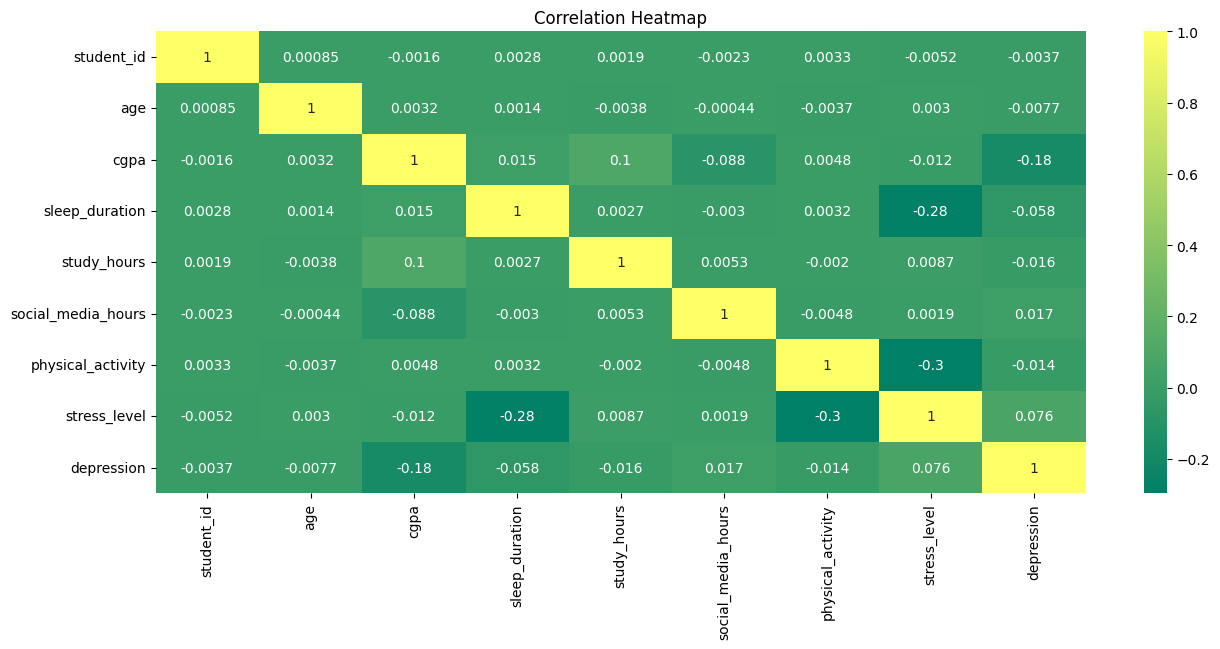

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='summer')
plt.title('Correlation Heatmap')
plt.show()

In [13]:

correlation_with_depression = df.corr(numeric_only=True)['depression'].sort_values(ascending=False)
print(correlation_with_depression)


depression            1.000000
stress_level          0.075866
social_media_hours    0.016771
student_id           -0.003663
age                  -0.007722
physical_activity    -0.013935
study_hours          -0.015932
sleep_duration       -0.057529
cgpa                 -0.178971
Name: depression, dtype: float64


Outliers Detection

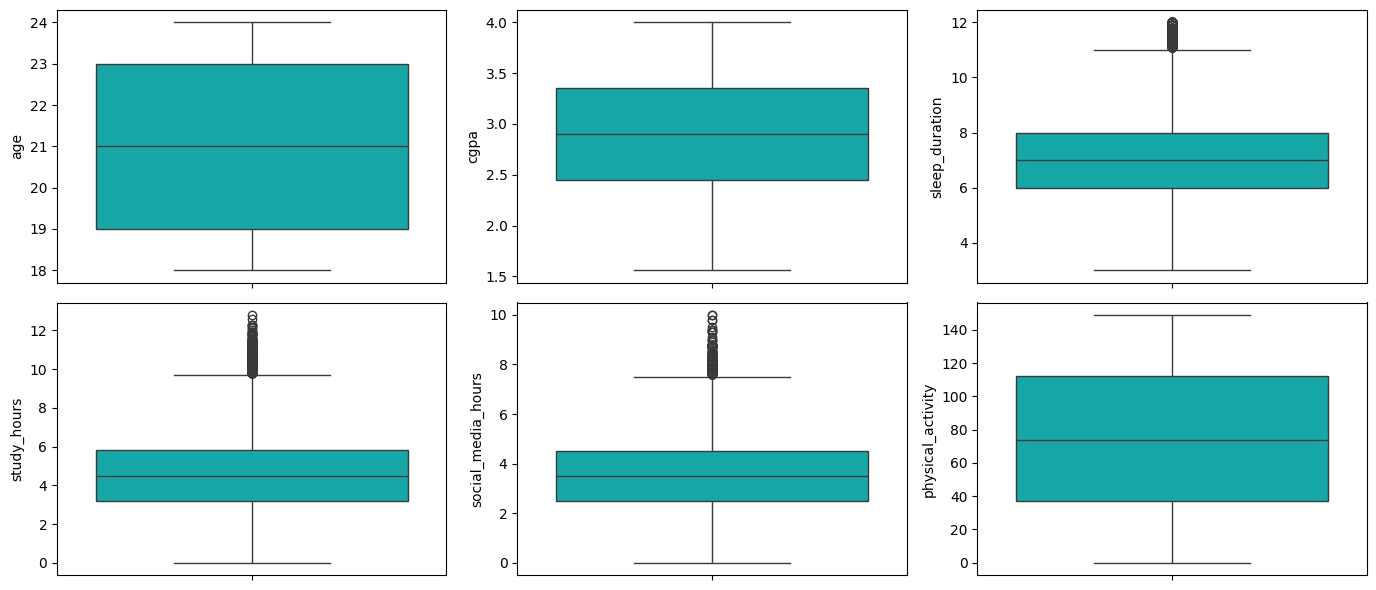

In [41]:
cols_to_plot=['age','cgpa','sleep_duration','study_hours','social_media_hours','physical_activity']

fig,axes=plt.subplots(2,3,figsize=(14,6))
axes=axes.flatten()
for i,col in enumerate(cols_to_plot):
  sns.boxplot(df[col],color='c',ax=axes[i])

plt.tight_layout()
plt.show()

Convert depresssion column Data type

In [ ]:
df['depression']=df['depression'].astype(int)

Categorical Feature Analysis

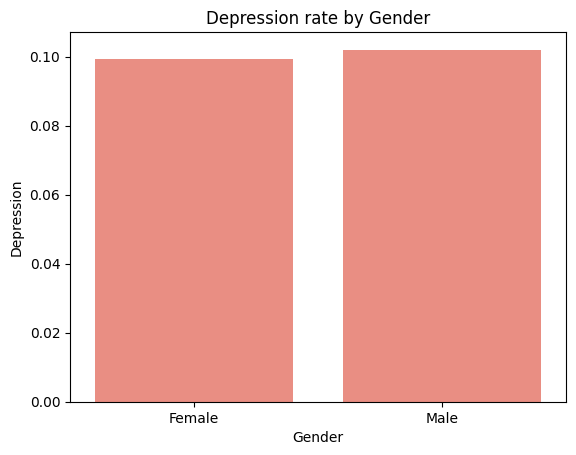

In [ ]:
sns.barplot(data=df,x='gender',y='depression',color='salmon',errorbar=None)
plt.xlabel('Gender')
plt.ylabel('Depression')
plt.title('Depression rate by Gender')
plt.show()

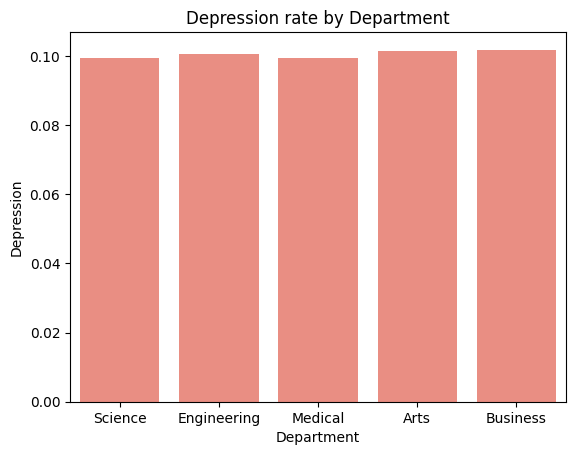

In [ ]:
sns.barplot(data=df,x='department',y='depression',color='salmon',errorbar=None)
plt.xlabel('Department')
plt.ylabel('Depression')
plt.title('Depression rate by Department')
plt.show()

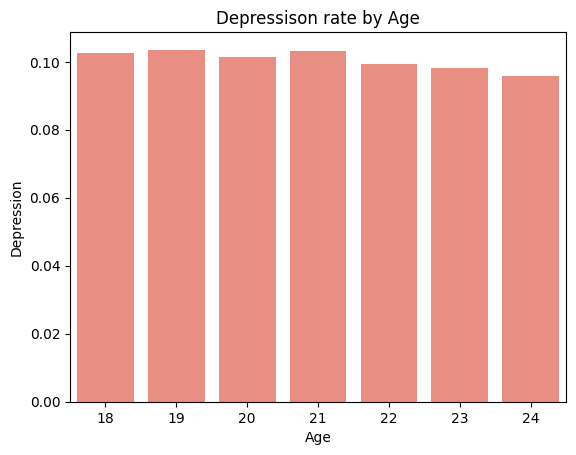

In [ ]:
sns.barplot(data=df,x='age',y='depression',color='salmon',errorbar=None)
plt.xlabel('Age')
plt.ylabel('Depression')
plt.title('Depressison rate by Age')
plt.show()

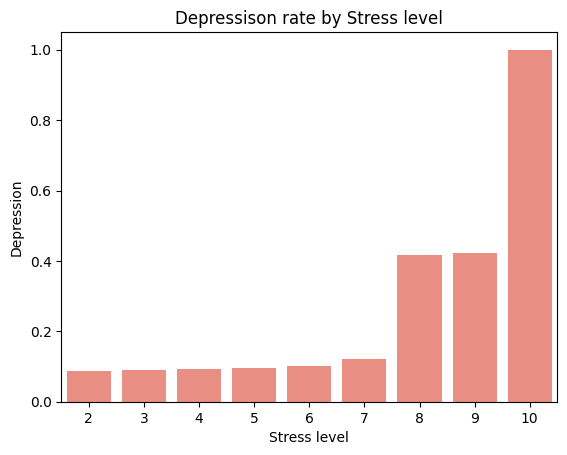

In [ ]:
sns.barplot(data=df,x='stress_level',y='depression',color='salmon',errorbar=None)
plt.xlabel('Stress level')
plt.ylabel('Depression')
plt.title('Depressison rate by Stress level')
plt.show()

Numerical Feature Analysis

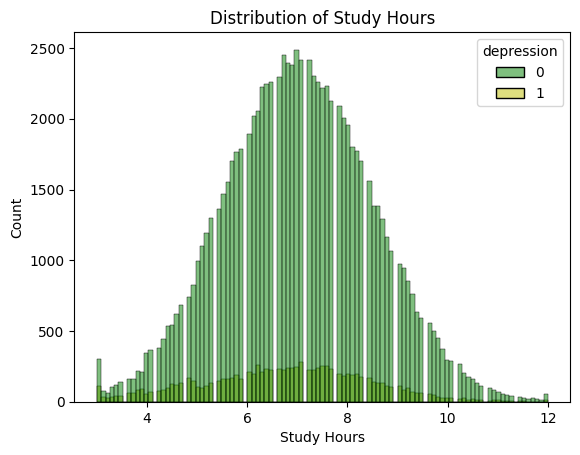

In [ ]:
sns.histplot(data=df,x='sleep_duration',hue='depression',palette=['g','y'])
plt.xlabel('Study Hours')
plt.title('Distribution of Study Hours')
plt.show()

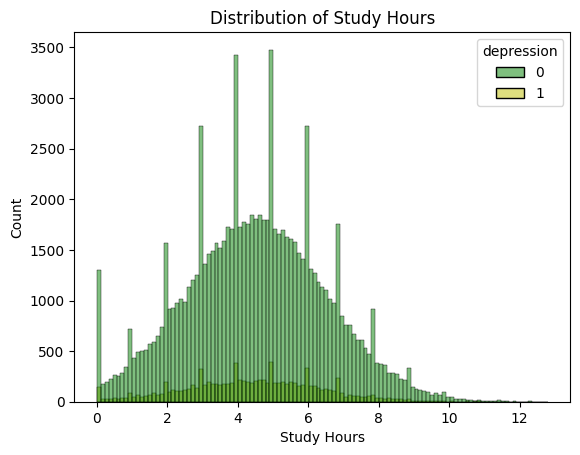

In [ ]:
sns.histplot(data=df,x='study_hours',hue='depression',palette=['g','y'])
plt.xlabel('Study Hours')
plt.title('Distribution of Study Hours')
plt.show()

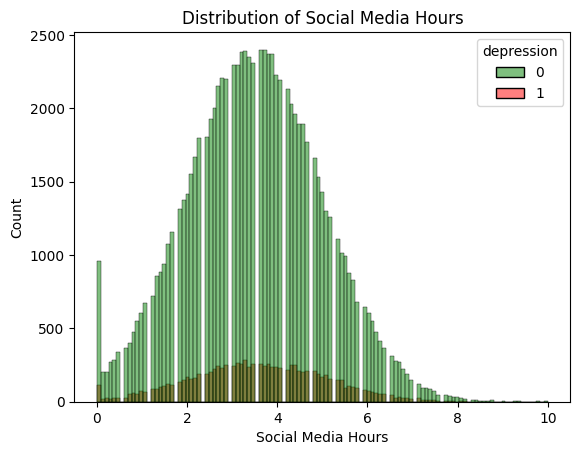

In [ ]:
sns.histplot(data=df,x='social_media_hours',hue='depression',palette=['g','r'])
plt.xlabel('Social Media Hours')
plt.title('Distribution of Social Media Hours')
plt.show()

# Feature Selection

Numerical Feature selection using ANOVA

In [15]:
X=df.drop(columns=['depression'])
y=df['depression']

In [42]:
X_numeric=X.select_dtypes(include=[np.number])
X_numeric.head()

,student_id,age,cgpa,sleep_duration,study_hours,social_media_hours,physical_activity,stress_level
0,1001,22,3.50,7.3,3.3,3.4,114,5
1,1002,20,2.72,5.5,7.2,6.0,142,2
2,1003,20,3.01,5.4,2.3,1.8,137,3
3,1004,21,3.63,8.1,2.0,4.6,130,3
4,1005,19,3.14,6.8,2.6,4.3,4,6


In [17]:
from sklearn.feature_selection import SelectKBest,f_classif

selector=SelectKBest(score_func=f_classif,k=5)
X_selected=selector.fit_transform(X_numeric,y)


selected_features=X_numeric.columns[selector.get_support()].to_list()
selected_features

['cgpa', 'sleep_duration', 'study_hours', 'social_media_hours', 'stress_level']

Categorical Feature selection using Chi-Square Test

In [18]:
from scipy.stats import chi2_contingency

def chi_square_test(df, cat_col, target):

    has_relationship=False
    contingency_table=pd.crosstab(df[cat_col],df[target])
    chi2,p_value,dof,expected=chi2_contingency(contingency_table)


    if p_value <0.05:
      has_relationship=True

    return has_relationship

In [19]:
check_gender =chi_square_test(df,'gender','depression')

if check_gender:
  print('There is a significant relationship between gender and depression')
else:
  print('There is No relationship between gender and depression')

There is No relationship between gender and depression


In [20]:
check_department =chi_square_test(df,'department','depression')

if check_department:
  print('There is a significant relationship between Department and depression')
else:
  print('There is No relationship between department and depression')

There is No relationship between department and depression


Final X and y after Feature Selection

In [21]:
X_final=df[selected_features]
y_final=y.copy()

In [22]:
X_final.head()

,cgpa,sleep_duration,study_hours,social_media_hours,stress_level
0,3.50,7.3,3.3,3.4,5
1,2.72,5.5,7.2,6.0,2
2,3.01,5.4,2.3,1.8,3
3,3.63,8.1,2.0,4.6,3
4,3.14,6.8,2.6,4.3,6


In [ ]:
y_final.head()

,depression
0,0
1,0
2,0
3,0
4,0


# Check Data is Imbalance or Not

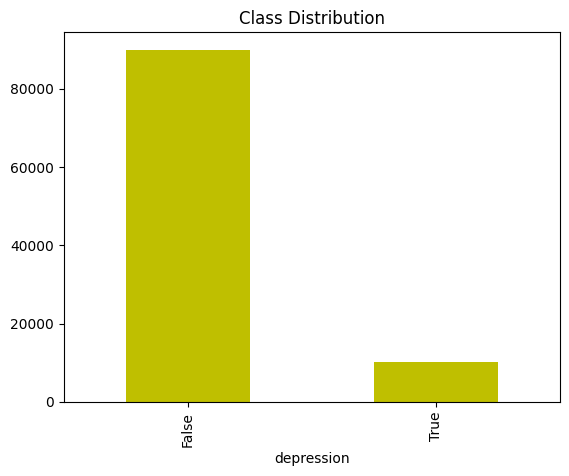

In [23]:
df['depression'].value_counts().plot(kind='bar',color='y')
plt.title('Class Distribution')
plt.show()

In [ ]:
df['depression'].value_counts()

,count
depression,
0,89938
1,10062


#Train -Test -Split

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42,stratify=y)

In [25]:
X_train.shape

(80000, 5)

In [26]:
X_test.shape

(20000, 5)

# Implement classification model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [32]:
models={

        'Decision Tree':DecisionTreeClassifier(
        max_depth=30,
        max_features=0.8,
        min_samples_split=100,
        min_samples_leaf=100,
        class_weight='balanced',
        random_state=42
    ),

        'Random Forest':RandomForestClassifier(
        n_estimators=300,
        max_depth=70,
        min_samples_split=70,
        min_samples_leaf=70,
        class_weight='balanced_subsample',
        random_state=42,
        n_jobs=-1
    ),

   'XGBoost':XGBClassifier(
       n_estimators=300,
        max_depth=80,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.9,
        scale_pos_weight=20,
        random_state=42,
        n_jobs=-1
    )


}

Train models using ML Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
results={}

for name,model in models.items():
  clf=Pipeline([
      ('classifier',model)
  ])
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)

  train_accuracy=accuracy_score(y_train,clf.predict(X_train))
  test_accuracy=accuracy_score(y_test,y_pred)

  results[name]={
      'Accuracy':accuracy_score(y_test,y_pred)*100,
      'Recall':recall_score(y_test,y_pred)*100,
      'Precision':precision_score(y_test,y_pred)*100,
      'F1_score':f1_score(y_test,y_pred)*100,
      'Overfitting Gap':(train_accuracy-test_accuracy)

  }

pd.DataFrame(results).T



,Accuracy,Recall,Precision,F1_score,Overfitting Gap
Decision Tree,66.77,65.208748,18.076605,28.306365,0.017138
Random Forest,73.21,64.065606,21.758947,32.484879,0.000250
XGBoost,85.84,18.588469,23.852041,20.893855,0.133925
